# Instalação de Bibliotecas

Podemos executar a instalação de bibliotecas faltantes por meio de chamadas ao gerenciador de pacotes.

In [1]:
!pip install numpy 
!pip install pandas
!pip install scipy
!pip install statsmodels
!pip install sklearn

# Ferramentas de Probabilidade

In [2]:
# inicialmente montamos o drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

arq_dados_stream = '/content/drive/MyDrive/FIAP/DAN-BD/netflix_titles.csv'
df_dados_stream = pd.read_csv(arq_dados_stream)
df_dados_stream

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


show_id  ...                                        description
0      s1  ...  As her father nears the end of his life, filmm...
1      s2  ...  After crossing paths at a party, a Cape Town t...
2      s3  ...  To protect his family from a powerful drug lor...
3      s4  ...  Feuds, flirtations and toilet talk go down amo...
4      s5  ...  In a city of coaching centers known to train I...
5      s6  ...  The arrival of a charismatic young priest brin...
6      s7  ...  Equestria's divided. But a bright-eyed hero be...
7      s8  ...  On a photo shoot in Ghana, an American model s...
8      s9  ...  A talented batch of amateur bakers face off in...
9     s10  ...  A woman adjusting to life after a loss contend...

[10 rows x 12 columns]

In [4]:
df_dados_stream

show_id  ...                                        description
0         s1  ...  As her father nears the end of his life, filmm...
1         s2  ...  After crossing paths at a party, a Cape Town t...
2         s3  ...  To protect his family from a powerful drug lor...
3         s4  ...  Feuds, flirtations and toilet talk go down amo...
4         s5  ...  In a city of coaching centers known to train I...
...      ...  ...                                                ...
8802   s8803  ...  A political cartoonist, a crime reporter and a...
8803   s8804  ...  While living alone in a spooky town, a young g...
8804   s8805  ...  Looking to survive in a world taken over by zo...
8805   s8806  ...  Dragged from civilian life, a former superhero...
8806   s8807  ...  A scrappy but poor boy worms his way into a ty...

[8807 rows x 12 columns]

In [3]:
df_dados_stream['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [6]:
idx_movies_2020 = (df_dados_stream['type'] == 'Movie') & (df_dados_stream['release_year'] == 2020)
df_dados_filmes = df_dados_stream[ idx_movies_2020 ]

#df_dados_filmes

idx_comedias_dramas_2020 = df_dados_filmes['listed_in'].str.contains('Comedies|Dramas')
df_comedias_dramas = df_dados_filmes[idx_comedias_dramas_2020]
df_comedias_dramas

show_id  ...                                        description
78       s79  ...  A budding politician has devious plans to rise...
84       s85  ...  Twins are reunited as a good-hearted female ga...
103     s104  ...  A family faces destruction in a long-running c...
119     s120  ...  After meeting through a heated exchange on soc...
126     s127  ...  A couple must strive to remain resilient after...
...      ...  ...                                                ...
3009   s3010  ...  When gentle, law-abiding Grace confesses to ki...
3041   s3042  ...  A special agent abruptly reunites with a crimi...
3044   s3045  ...  When Emilio (Oscar Martínez) is diagnosed with...
3046   s3047  ...  Thirteen-year-old José Miguel is immune to 199...
8099   s8100  ...  When a gay brainiac with OCD questions his ide...

[287 rows x 12 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Se no perfil de um usuário são mostrados 100 filmes, quantas combinações podemos fazer?


In [10]:
from itertools import combinations
total_filmes_por_perfil = 100

combinacoes_perfil = combinations(df_comedias_dramas.index, total_filmes_por_perfil)
amostra_combinacao = list(next(combinacoes_perfil))
amostra_combinacao = list(next(combinacoes_perfil))

filmes_perfil = df_comedias_dramas.loc[ amostra_combinacao ]
filmes_perfil

show_id  ...                                        description
78       s79  ...  A budding politician has devious plans to rise...
84       s85  ...  Twins are reunited as a good-hearted female ga...
103     s104  ...  A family faces destruction in a long-running c...
119     s120  ...  After meeting through a heated exchange on soc...
126     s127  ...  A couple must strive to remain resilient after...
...      ...  ...                                                ...
1560   s1561  ...  A group of down-on-their-luck Broadway stars s...
1561   s1562  ...  At an Afghanistan refugee camp, an ex-army doc...
1563   s1564  ...  A student must navigate issues of sexuality, i...
1571   s1572  ...  An idealistic engineer builds his own island o...
1584   s1585  ...  An elite assassin wrestling with doubts about ...

[100 rows x 12 columns]

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(32, 12))
plt.xticks(rotation=45)
filmes_perfil['director'].hist()

In [12]:
filmes_perfil.head()

show_id  ...                                        description
78      s79  ...  A budding politician has devious plans to rise...
84      s85  ...  Twins are reunited as a good-hearted female ga...
103    s104  ...  A family faces destruction in a long-running c...
119    s120  ...  After meeting through a heated exchange on soc...
126    s127  ...  A couple must strive to remain resilient after...

[5 rows x 12 columns]

In [14]:
duracao_filmes = filmes_perfil['duration'].value_counts().to_frame() 
duracao_filmes = duracao_filmes.reset_index()
duracao_filmes.columns = ['duracao', 'ocorrencias']

duracao_filmes_agg = duracao_filmes.set_index('duracao')
duracao_filmes_agg

ocorrencias
duracao             
101 min            7
105 min            6
107 min            5
119 min            5
116 min            4
115 min            4
123 min            4
97 min             4
102 min            4
94 min             3
95 min             3
91 min             3
113 min            2
112 min            2
92 min             2
98 min             2
109 min            2
145 min            2
85 min             2
127 min            2
71 min             1
87 min             1
8 min              1
128 min            1
121 min            1
138 min            1
143 min            1
84 min             1
126 min            1
83 min             1
140 min            1
78 min             1
108 min            1
147 min            1
103 min            1
89 min             1
132 min            1
93 min             1
28 min             1
9 min              1
149 min            1
59 min             1
120 min            1
24 min             1
136 min            1
133 min            1
15 min             1
99 min             1
117 min            1
106 min            1
82 min             1
88 min             1

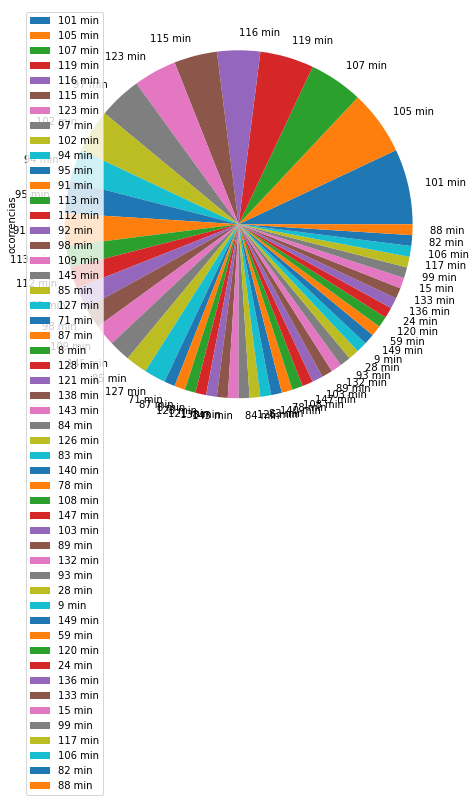

In [16]:
plot = duracao_filmes_agg.plot.pie(y='ocorrencias', figsize=(8, 8))


CENÁRIO: Temos um usuário do serviço de streaming, com a sua sugestão de filmes gerada por meio do processo de selecionar uma das combinações aleatórias e o mesmo utiliza um botão de seleção aleatória para escolher um filme. 
De acordo com o histórico do usuário, ele não costuma assistir filmes longos até o final.

QUESTIONAMENTO: Qual a probabilidade da seleção aleatória trazer para ele um filme maior que 100 minutos?

In [17]:
duracao_filmes['duracao'] = duracao_filmes['duracao'].apply(lambda x:int(x.split()[0]))
duracao_filmes


duracao  ocorrencias
0       101            7
1       105            6
2       107            5
3       119            5
4       116            4
5       115            4
6       123            4
7        97            4
8       102            4
9        94            3
10       95            3
11       91            3
12      113            2
13      112            2
14       92            2
15       98            2
16      109            2
17      145            2
18       85            2
19      127            2
20       71            1
21       87            1
22        8            1
23      128            1
24      121            1
25      138            1
26      143            1
27       84            1
28      126            1
29       83            1
30      140            1
31       78            1
32      108            1
33      147            1
34      103            1
35       89            1
36      132            1
37       93            1
38       28            1
39        9            1
40      149            1
41       59            1
42      120            1
43       24            1
44      136            1
45      133            1
46       15            1
47       99            1
48      117            1
49      106            1
50       82            1
51       88            1

In [18]:
idx_maiores_100min = duracao_filmes['duracao'] > 100
duracao_filmes_maiores_100 = duracao_filmes[idx_maiores_100min]

probabilidade_maior_100 = duracao_filmes_maiores_100['ocorrencias'].sum()/duracao_filmes['duracao'].sum()

round(probabilidade_maior_100, 2)

0.01